In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from collections import Counter

In [2]:
file_path = "/home/carlos/Notebooks/Data/r_insomnia_comments.jsonl"

In [3]:
df = pd.read_json(file_path, lines=True)

In [4]:
df.head()

,all_awardings,archived,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,mod_reports,num_reports,removal_reason,replies,report_reasons,saved,user_reports,body_sha1,nest_level,body_html
0,[],False,NaN,shuerpiola,1.437326e+09,None,NaN,[],NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,NaN,WeAreAllStarsHere,1.541807e+09,None,NaN,[],NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,NaN,OtherSquare7,1.587844e+09,None,NaN,[],NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,NaN,WeAreAllStarsHere,1.541807e+09,None,NaN,[],NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,NaN,OtherSquare7,1.587844e+09,None,NaN,[],NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Seems there are a lot of columns with little or no information used on them so I will take them out to keep the set as simple/light as possible.

In [5]:
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['all_awardings', 'archived', 'associated_award', 'author',
       'author_created_utc', 'author_flair_background_color',
       'author_flair_css_class', 'author_flair_richtext',
       'author_flair_template_id', 'author_flair_text',
       'author_flair_text_color', 'author_flair_type', 'author_fullname',
       'author_patreon_flair', 'author_premium', 'body', 'can_gild',
       'collapsed', 'collapsed_because_crowd_control', 'collapsed_reason',
       'collapsed_reason_code', 'comment_type', 'controversiality',
       'created_utc', 'distinguished', 'edited', 'gilded', 'gildings', 'id',
       'is_submitter', 'link_id', 'locked', 'name', 'no_follow', 'parent_id',
       'permalink', 'retrieved_on', 'score', 'score_hidden', 'send_replies',
       'stickied', 'subreddit', 'subreddit_id', 'subreddit_name_prefixed',
       'subreddit_type', 'top_awarded_type', 'total_awards_received',
       'treatment_tags', 'unrepliable_reason', 'ups', 'au

In [6]:
to_remove = ['all_awardings', 'archived', 'associated_award', 'author_created_utc', 
        'author_flair_background_color',
       'author_flair_css_class', 'author_flair_richtext',
       'author_flair_template_id', 'author_flair_text',
       'author_flair_text_color', 'author_flair_type', 'author_fullname',
       'author_patreon_flair', 'author_premium', 'can_gild',
       'collapsed', 'collapsed_because_crowd_control', 'collapsed_reason',
       'collapsed_reason_code', 'comment_type', 'controversiality', 'distinguished', 
       'edited', 'gilded', 'gildings',
       'is_submitter', 'link_id', 'locked', 'no_follow',
       'permalink', 'retrieved_on', 'score', 'score_hidden', 'send_replies',
       'stickied', 'subreddit', 'subreddit_id', 'subreddit_name_prefixed',
       'subreddit_type', 'top_awarded_type', 'total_awards_received',
       'treatment_tags', 'unrepliable_reason', 'author_cakeday',
       'editable', '_meta', 'approved_at_utc', 'approved_by',
       'author_is_blocked', 'awarders', 'banned_at_utc', 'banned_by',
       'can_mod_post', 'mod_note',
       'mod_reason_by', 'mod_reason_title', 'mod_reports', 'num_reports',
       'removal_reason', 'replies', 'report_reasons', 'saved', 'user_reports',
       'body_sha1', 'nest_level', 'body_html']

In [7]:
df.drop(columns = to_remove, axis=1, inplace=True)

In [8]:
#How many unique users posted in the comments?
unique_users = df['author'].nunique()
print(f"There were {unique_users} unique users posting between 2022-2024")

There were 47572 unique users posting between 2022-2024


In [9]:
rows = len(df)
print(f"There are {rows} rows/comments in the dataset which means {round(rows/unique_users)} average comments per user")

There are 314808 rows/comments in the dataset which means 7 average comments per user


The column showing when the comment was created (created_utc) needs to be converted to a more usefult format (yyyy-mm-dd)

In [10]:
df['date_0'] = df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

In [11]:
df['date'] = df['date_0'].dt.date

Extracting the timestamp in case I want to explore that later.

In [12]:
df['time'] = df['date_0'].dt.time

In [13]:
df.head()

,author,body,created_utc,id,name,parent_id,ups,created,downs,likes,date_0,date,time
0,shuerpiola,"I slept soundly with just 50 mg, but I haven’t...",2022-01-24 00:02:28,hty7pez,t1_hty7pez,t1_htx58yd,1,NaN,NaN,NaN,2022-01-24 00:02:28,2022-01-24,00:02:28
1,WeAreAllStarsHere,There are medications to help for sleep. They ...,2022-01-24 00:17:27,hty9vyq,t1_hty9vyq,t3_sb85l7,2,NaN,NaN,NaN,2022-01-24 00:17:27,2022-01-24,00:17:27
2,OtherSquare7,I don’t have any sleep medication as far as I’...,2022-01-24 00:19:07,htya4qf,t1_htya4qf,t1_hty9vyq,1,NaN,NaN,NaN,2022-01-24 00:19:07,2022-01-24,00:19:07
3,WeAreAllStarsHere,Benadryl is a cold medicine that works in a pi...,2022-01-24 00:20:08,htyaa2d,t1_htyaa2d,t1_htya4qf,2,NaN,NaN,NaN,2022-01-24 00:20:08,2022-01-24,00:20:08
4,OtherSquare7,Yeah I’ll try get some tomorrow and hope for b...,2022-01-24 00:23:14,htyaq5w,t1_htyaq5w,t1_htyaa2d,2,NaN,NaN,NaN,2022-01-24 00:23:14,2022-01-24,00:23:14


This version of the dataframe seems fine. Now working directly with contents of the comments column ("body").
I am using the Natural Language Toolkit
More information about it here: https://www.nltk.org/ or also here: https://github.com/nltk/nltk

In [14]:
#pip install nltk


In [15]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
nltk.download('punkt') 
nltk.download('stopwords') 
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /home/carlos/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/carlos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/carlos/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [16]:
stop_words = set(stopwords.words('english'))

In [17]:
def preprocess_text(text):
  tokens = word_tokenize(text.lower()) # Tokenize and lowercase
  tokens = [token for token in tokens if token.isalnum() and token not in stop_words] # Remove punctuation, numbers and stop words
  return tokens

In [18]:
df['tokens'] = df['body'].apply(preprocess_text)

In [19]:
all_tokens = [token for tokens_list in df['tokens'] for token in tokens_list]
word_frequencies = Counter(all_tokens)

In [20]:
word_frequencies.most_common(30)

[('sleep', 221949),
 ('like', 72490),
 ('get', 71426),
 ('insomnia', 69282),
 ('take', 50250),
 ('night', 47830),
 ('time', 43712),
 ('also', 38258),
 ('anxiety', 36425),
 ('hours', 35174),
 ('would', 34802),
 ('try', 34696),
 ('feel', 33374),
 ('day', 32866),
 ('help', 32318),
 ('work', 31782),
 ('really', 31670),
 ('go', 31314),
 ('know', 31221),
 ('one', 31167),
 ('even', 30417),
 ('good', 29572),
 ('think', 29261),
 ('much', 28289),
 ('bed', 28069),
 ('people', 27915),
 ('asleep', 27667),
 ('sleeping', 27388),
 ('taking', 25383),
 ('going', 24581)]

Can I do a wordcloud out of this?

In [21]:
#pip install wordcloud

In [22]:
from wordcloud import WordCloud

In [23]:
cloud = word_frequencies.most_common(30)


In [24]:
word_counts = dict(cloud)
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_counts)

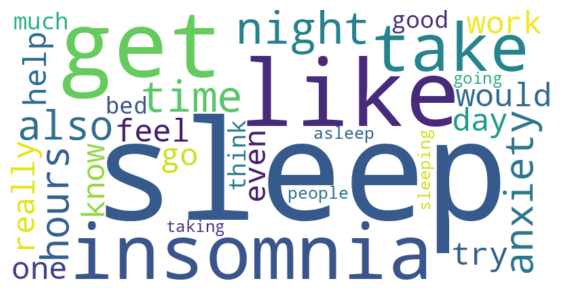

In [25]:
plt.figure(figsize=(7, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Nice :)

Next thing is to get all those tokens and use a GPT to extract the most common drug treatments mentioned.

In [26]:
tokens_df = pd.DataFrame({'token': all_tokens})

In [27]:
tokens_df.to_csv('all_comments.csv', index=False) #resulting file is too large so I need to split in 2

In [28]:
'''
def split_csv(input_file, output_file_prefix, num_parts):
    """Splits a CSV file into multiple parts.

    Args:
        input_file: Path to the input CSV file.
        output_file_prefix: Prefix for the output file names (e.g., 'part_').
        num_parts: The number of parts to split the file into.
    """

    df = pd.read_csv(input_file)
    num_rows = len(df)
    rows_per_part = num_rows // num_parts  # Integer division to get the number of rows per part

    for i in range(num_parts):
        start_row = i * rows_per_part
        end_row = (i + 1) * rows_per_part if i < num_parts - 1 else num_rows  # Handle the last part
        df_part = df.iloc[start_row:end_row]
        output_file = f"{output_file_prefix}{i + 1}.csv"
        df_part.to_csv(output_file, index=False)
        print(f"Part {i+1} saved to {output_file}")


# Example usage:
input_csv = 'all_comments.csv'  
output_prefix = 'part_'
number_of_parts = 2
split_csv(input_csv, output_prefix, number_of_parts)
'''

'\ndef split_csv(input_file, output_file_prefix, num_parts):\n    """Splits a CSV file into multiple parts.\n\n    Args:\n        input_file: Path to the input CSV file.\n        output_file_prefix: Prefix for the output file names (e.g., \'part_\').\n        num_parts: The number of parts to split the file into.\n    """\n\n    df = pd.read_csv(input_file)\n    num_rows = len(df)\n    rows_per_part = num_rows // num_parts  # Integer division to get the number of rows per part\n\n    for i in range(num_parts):\n        start_row = i * rows_per_part\n        end_row = (i + 1) * rows_per_part if i < num_parts - 1 else num_rows  # Handle the last part\n        df_part = df.iloc[start_row:end_row]\n        output_file = f"{output_file_prefix}{i + 1}.csv"\n        df_part.to_csv(output_file, index=False)\n        print(f"Part {i+1} saved to {output_file}")\n\n\n# Example usage:\ninput_csv = \'all_comments.csv\'  \noutput_prefix = \'part_\'\nnumber_of_parts = 2\nsplit_csv(input_csv, output_p

Now that I know most common drugs mentioned in the comments I want to use them to filter out the posts from both datasets and run a sentiment analysis

In [29]:
drugs = [
    "Melatonin",
    "Zolpidem",
    "Ambien",
    "Trazodone",
    "Quetiapine",
    "Seroquel",
    "Eszopiclone",
    "Lunesta",
    "Alprazolam",
    "Xanax",
    "Lemborexant",
    "Dayvigo",
    "Lorazepam",
    "Ativan",
    "Doxepin",
    "Quviviq",
    "Daridorexant",
    "Gabapentin",
    "Temazepam",
    "Restoril",
    "Diazepam",
    "Valium",
    "Suvorexant",
    "Belsomra",
    "Diphenhydramine",
    "Clonidine",
    "Ramelteon",
    "Rozerem",
    "Zaleplon",
    "Sonata",
    "Pregabalin", "Mirtazapine", "Remeron", "Clonazepam", "Klonopin", "Hydroxyzine", "Vistaril","Neurontin"
]

Getting some attributes for visualization

In [30]:
df['day_of_week'] = df['date_0'].dt.day_name()
df['month'] = df['date_0'].dt.month_name()
df['year'] = df['date_0'].dt.year
df['hour'] = df['date_0'].dt.hour


In [31]:
df.head()

,author,body,created_utc,id,name,parent_id,ups,created,downs,likes,date_0,date,time,tokens,day_of_week,month,year,hour
0,shuerpiola,"I slept soundly with just 50 mg, but I haven’t...",2022-01-24 00:02:28,hty7pez,t1_hty7pez,t1_htx58yd,1,NaN,NaN,NaN,2022-01-24 00:02:28,2022-01-24,00:02:28,"[slept, soundly, 50, mg, used, long, term, los...",Monday,January,2022,0
1,WeAreAllStarsHere,There are medications to help for sleep. They ...,2022-01-24 00:17:27,hty9vyq,t1_hty9vyq,t3_sb85l7,2,NaN,NaN,NaN,2022-01-24 00:17:27,2022-01-24,00:17:27,"[medications, help, sleep, meant, short, term,...",Monday,January,2022,0
2,OtherSquare7,I don’t have any sleep medication as far as I’...,2022-01-24 00:19:07,htya4qf,t1_htya4qf,t1_hty9vyq,1,NaN,NaN,NaN,2022-01-24 00:19:07,2022-01-24,00:19:07,"[sleep, medication, far, aware, tomorrow, thin...",Monday,January,2022,0
3,WeAreAllStarsHere,Benadryl is a cold medicine that works in a pi...,2022-01-24 00:20:08,htyaa2d,t1_htyaa2d,t1_htya4qf,2,NaN,NaN,NaN,2022-01-24 00:20:08,2022-01-24,00:20:08,"[benadryl, cold, medicine, works, pinch, sleep...",Monday,January,2022,0
4,OtherSquare7,Yeah I’ll try get some tomorrow and hope for b...,2022-01-24 00:23:14,htyaq5w,t1_htyaq5w,t1_htyaa2d,2,NaN,NaN,NaN,2022-01-24 00:23:14,2022-01-24,00:23:14,"[yeah, try, get, tomorrow, hope, better, sleep...",Monday,January,2022,0


In [32]:
pivot = df.pivot_table(index='day_of_week', columns='hour', aggfunc='size', fill_value=0)

<Axes: xlabel='hour', ylabel='day_of_week'>

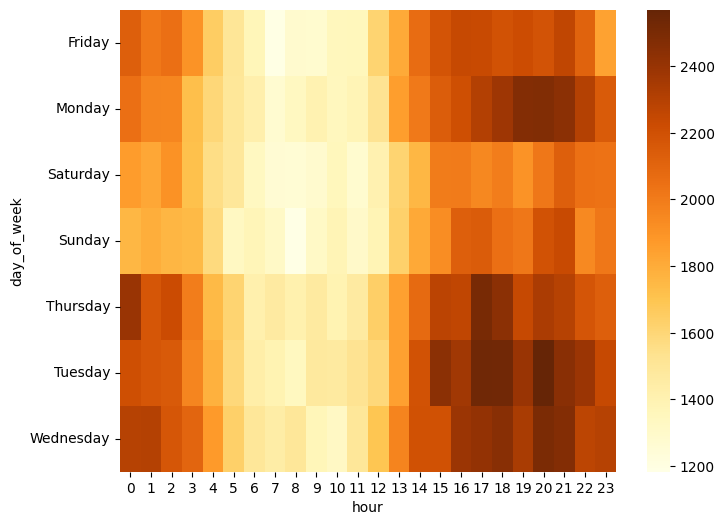

In [33]:
plt.figure(figsize=(8,6))
sns.heatmap(data=pivot, cmap='YlOrBr')

Cool, but the days are in alphabetical order and I would rather have them as they come in the week :) 
One approach is to categorize the column using pd.Categorical

In [34]:
# Defining the order of the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [35]:
# Convert the 'day_of_week' column to a categorical type with the specified order
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=day_order, ordered=True)

In [36]:
pivot = df.pivot_table(index='day_of_week', columns='hour', aggfunc='size', fill_value=0)

/tmp/ipykernel_503/3231555516.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(index='day_of_week', columns='hour', aggfunc='size', fill_value=0)


<Axes: title={'center': 'Density of Comments by Days of the Week and Hour of the Day'}, xlabel='hour', ylabel='day_of_week'>

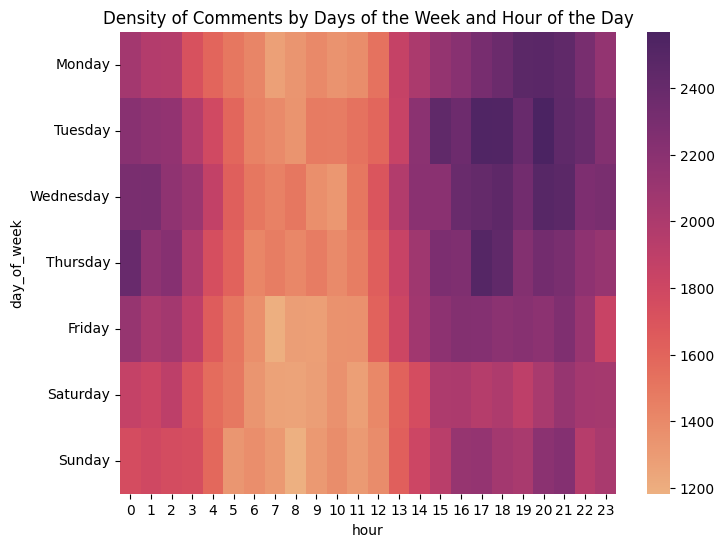

In [37]:
plt.figure(figsize=(8,6))
plt.title('Density of Comments by Days of the Week and Hour of the Day')
sns.heatmap(data=pivot, cmap='flare')

From the heatmap we see Tuesdays afternoon/evening is when most of the people are replying to the orignal poster.
There is also a good share of people upbeween 00 and 02 in the morning commenting on any topic on Wednesdays and Thursdays.

Another thing I was wondering is how often is each drug mentioned my month, are there any drugs that have been more talked about in the past 6 months? 18 months?
Let's check out what Copilot suggests?

In [38]:
# Initialize a dictionary to store the counts
drug_mentions = {drug: [] for drug in drugs}

# Group the dataframe by year and month
grouped = df.groupby(['year', 'month'])

# Iterate through each group and count the mentions of each drug
for (year, month), group in grouped:
    month_counts = Counter()
    for drug in drugs:
        month_counts[drug] = group['body'].str.contains(drug, case=False, na=False).sum()
    for drug in drugs:
        drug_mentions[drug].append((year, month, month_counts[drug]))

# Convert the dictionary to a DataFrame for easier visualization
drug_mentions_df = pd.DataFrame([(drug, year, month, count) for drug, mentions in drug_mentions.items() for year, month, count in mentions],
                                columns=['Drug', 'Year', 'Month', 'Count'])

# Display the DataFrame
drug_mentions_df.head()

,Drug,Year,Month,Count
0,Melatonin,2022,April,366
1,Melatonin,2022,August,257
2,Melatonin,2022,December,295
3,Melatonin,2022,February,260
4,Melatonin,2022,January,100


In [39]:
drug_mentions_df['date'] = pd.to_datetime(drug_mentions_df['Year'].astype(str) + ' ' + drug_mentions_df['Month'], format='%Y %B')

Note: I did a first line chart with all orignal drugs from the list but it was very crowded and hard to read so what I did now was to choose only a few of them considering well established ones like Ambien and Trazodone and newer therapies like DORAS (Belsomra, Dayvigo, Quviviq).

In [42]:
selected_drugs = drug_mentions_df[drug_mentions_df['Drug'].isin(['Ambien', 'Lunesta', 'Trazodone', 'Melatonin', 'Seroquel', 'Quviviq','Dayvigo', 'Belsomra'])]

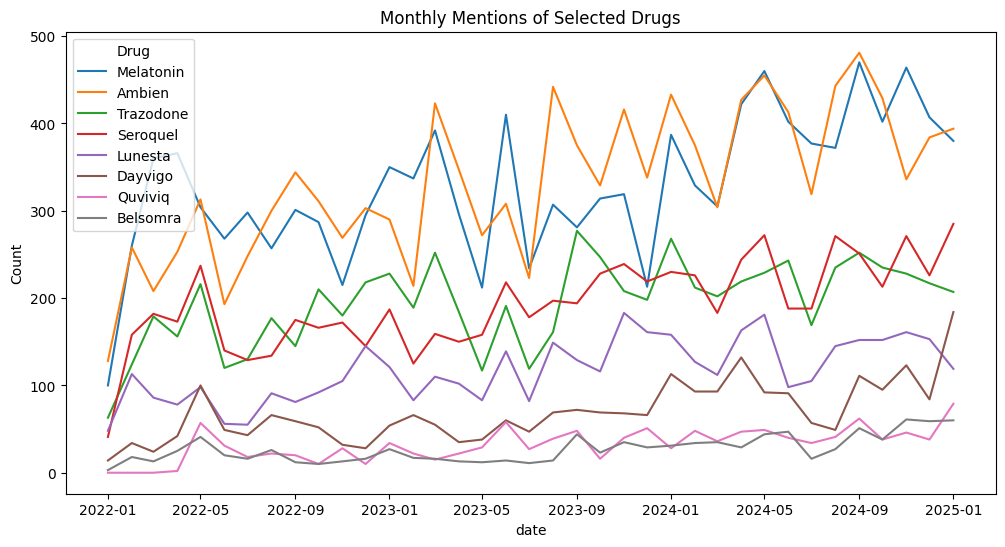

In [43]:
plt.figure(figsize=(12, 6))
plt.title('Monthly Mentions of Selected Drugs')
sns.lineplot(data=selected_drugs, x='date', y='Count', hue='Drug')
plt.show()

Melatonin and Zolpidem (Ambien) mentions are consistently on top while the relatively newer therapies (Belsomra, Dayvigo, Quviviq) are less discussed despite being considered to have a better satefy profile than Zolpidem. Quviviq (Daridorexant) does show a positive trend which drives the collective mentions of DORAS up.

There also appears to be some type of pattern/seasonality for Ambien mentions or at least overal activity in the subreddit, maybe something to look into sometime in the future.